<a href="https://colab.research.google.com/github/lonecoder007/Genterating-Fake-Mnist-data-using-DCGAN/blob/master/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
import numpy as np

In [33]:
(X_Train,_),(_,_) = mnist.load_data()

In [34]:
print(X_Train.shape)
print(type(X_Train))

X_Train = X_Train.reshape((*(X_Train.shape),1))
print(X_Train.shape)

(60000, 28, 28)
<class 'numpy.ndarray'>
(60000, 28, 28, 1)


In [35]:
#Normalize the Data between -1 and 1

X_Train = (X_Train.astype('float32') - 127.5)/127.5

print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


In [36]:
NUM_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)

NOISE_DIM = 100

adam = Adam(lr=2e-4,beta_1=0.5)

In [37]:
#Upsampling 
# Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Double the Activation Size 14 X 14 X 64
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double the Activation Size 28 X 28 X 1
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))

# Final Output (No ReLu or Batch Norm)
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()



#Discriminator - Downsampling
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

# Prefer Strided Convolutions over MaxPooling
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 14, 14, 64)       

In [38]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

In [39]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [40]:
X_Train.shape

(60000, 28, 28, 1)

Epoch 1 D loss: 53.577035 G loss: 70.680037
Epoch 2 D loss: 171.147989 G loss: 204.135483
Epoch 3 D loss: 165.298869 G loss: 211.761565
Epoch 4 D loss: 162.266007 G loss: 209.517021
Epoch 5 D loss: 163.993216 G loss: 201.031500
Epoch 6 D loss: 163.707995 G loss: 198.364617
Epoch 7 D loss: 163.027476 G loss: 198.280680
Epoch 8 D loss: 162.600494 G loss: 196.785493
Epoch 9 D loss: 162.130873 G loss: 198.721574
Epoch 10 D loss: 161.809793 G loss: 197.958215


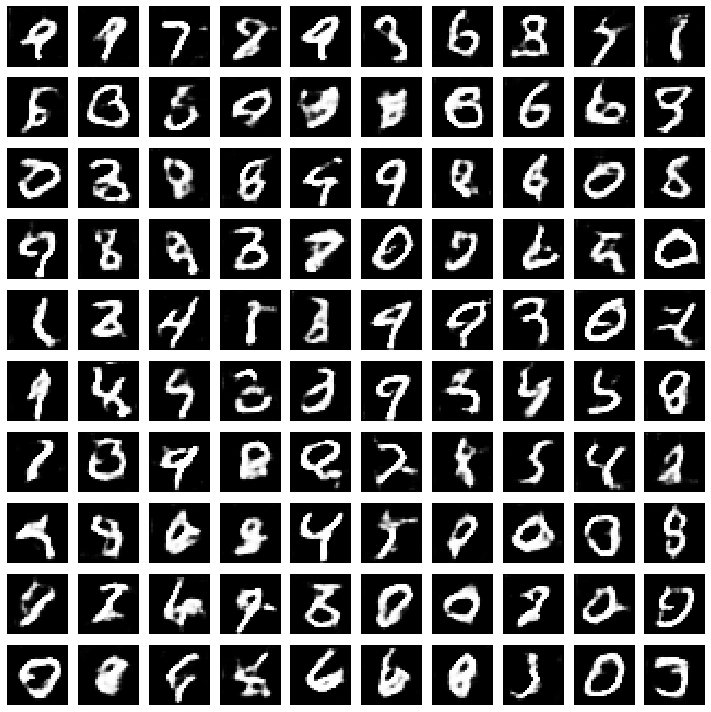

Epoch 11 D loss: 161.628500 G loss: 198.114528
Epoch 12 D loss: 161.412623 G loss: 197.731372
Epoch 13 D loss: 161.208891 G loss: 199.384695
Epoch 14 D loss: 161.154286 G loss: 198.923332
Epoch 15 D loss: 161.177164 G loss: 196.317758
Epoch 16 D loss: 160.806552 G loss: 199.540409
Epoch 17 D loss: 160.731000 G loss: 199.532625
Epoch 18 D loss: 160.492696 G loss: 199.430901
Epoch 19 D loss: 160.491066 G loss: 200.278404
Epoch 20 D loss: 160.248158 G loss: 201.528215


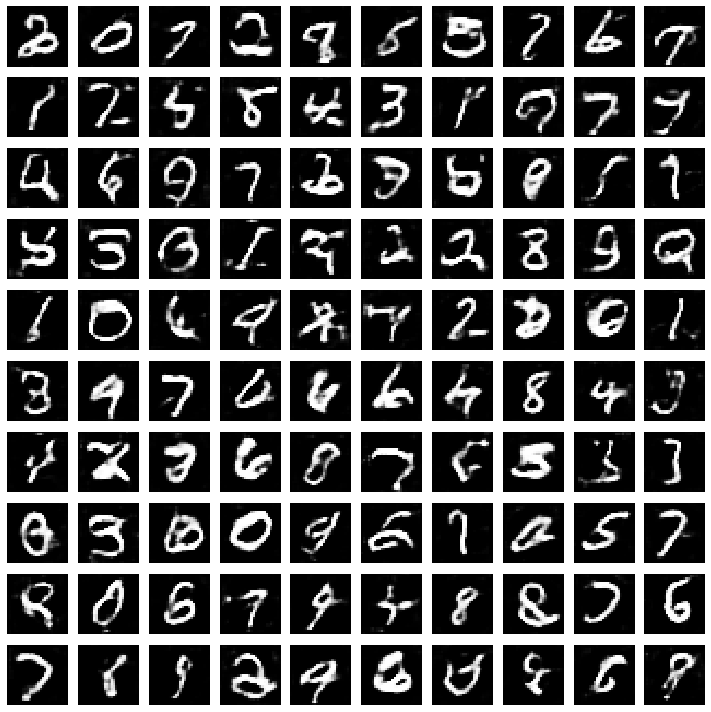

Epoch 21 D loss: 160.373755 G loss: 199.150207
Epoch 22 D loss: 159.937777 G loss: 202.023593
Epoch 23 D loss: 160.123306 G loss: 199.494289
Epoch 24 D loss: 159.883838 G loss: 202.015113
Epoch 25 D loss: 159.439186 G loss: 204.784940
Epoch 26 D loss: 159.750001 G loss: 201.786496
Epoch 27 D loss: 159.460356 G loss: 202.309744
Epoch 28 D loss: 159.394588 G loss: 203.622760
Epoch 29 D loss: 158.792789 G loss: 208.092850
Epoch 30 D loss: 158.931302 G loss: 204.179719


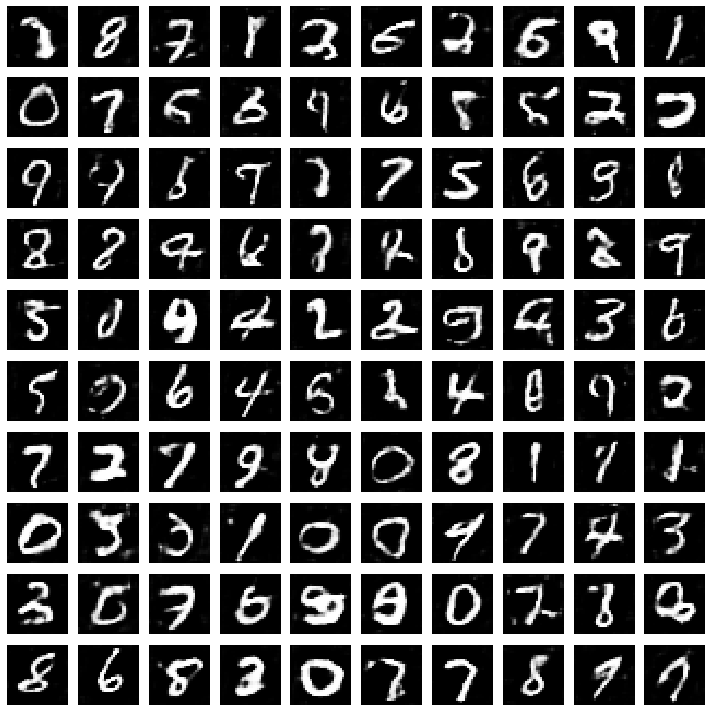

Epoch 31 D loss: 158.787456 G loss: 204.624960
Epoch 32 D loss: 158.591119 G loss: 206.501243
Epoch 33 D loss: 158.166759 G loss: 208.238446
Epoch 34 D loss: 158.042705 G loss: 207.765453
Epoch 35 D loss: 157.980152 G loss: 209.288484
Epoch 36 D loss: 157.904486 G loss: 209.147288
Epoch 37 D loss: 157.668423 G loss: 209.814593
Epoch 38 D loss: 157.406208 G loss: 210.940965
Epoch 39 D loss: 157.279403 G loss: 212.188791
Epoch 40 D loss: 157.057385 G loss: 212.605435


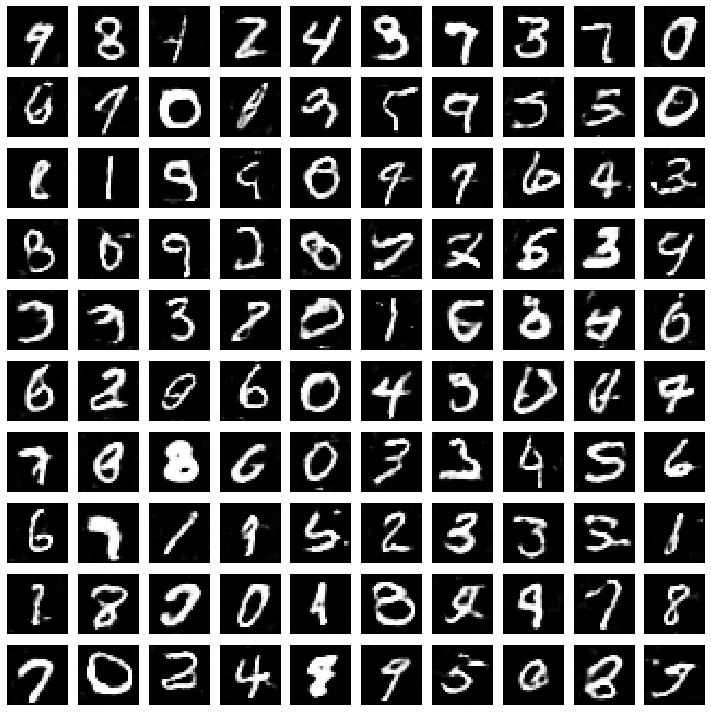

Epoch 41 D loss: 156.904294 G loss: 213.531392
Epoch 42 D loss: 156.653295 G loss: 213.811752
Epoch 43 D loss: 156.227353 G loss: 216.174266
Epoch 44 D loss: 156.324208 G loss: 216.011385
Epoch 45 D loss: 156.063077 G loss: 217.795765
Epoch 46 D loss: 155.524423 G loss: 217.771384
Epoch 47 D loss: 155.655425 G loss: 219.191657
Epoch 48 D loss: 155.294645 G loss: 220.396397
Epoch 49 D loss: 154.792686 G loss: 223.228036
Epoch 50 D loss: 154.801425 G loss: 222.450026


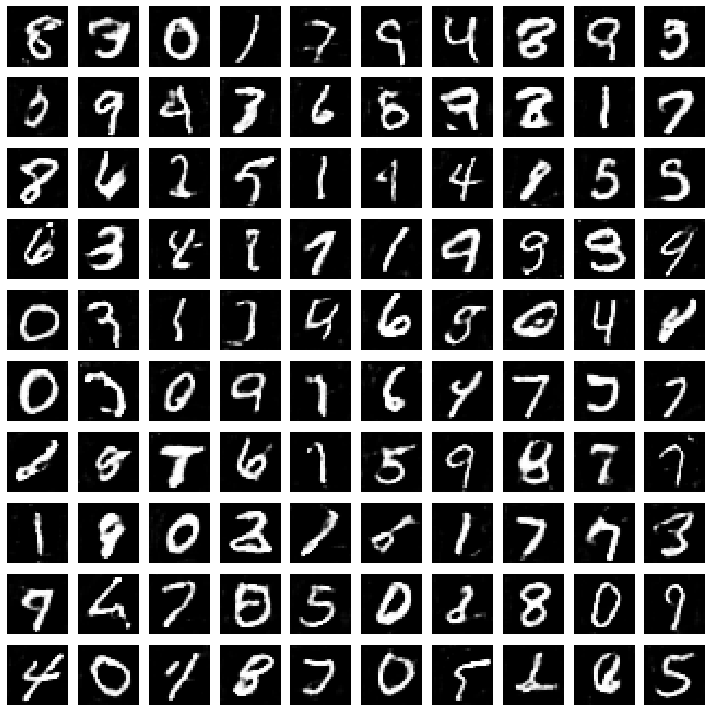

In [41]:
for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        
        #Train Generator (Complete Model Generator + Frozen Discriminator)
        
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        save_imgs(epoch)
